<a href="https://colab.research.google.com/github/snuyanzin/nrw-data-analytics/blob/main/2_Statistics_ext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Main guiding reference: https://www.crashkurs-statistik.de/ (unfortunately rather unusable as of September 2022)<br>
A possible strong help is the chrome extension https://support.deepl.com/hc/de/articles/4407516019218-Verf%C3%BCgbarkeit-von-Browsererweiterungen

## Statistics and repeated events

**Statistics** is a field that deals with the collection and analysis of data

A key assumption in classical statistics, is the fact that you can observe a certain event **repeatdely**

Examples:
- *Height*: you can go outside and you will see lots of people! You can observe the different heights, so this fulfills the assumption of repeated observations

- *World War*: in the last 5000 years there have only been two big world wars. This is **not** something we can observe repeatedly (and we don't want to repeat it!)

- *Seasonal flu*: every year during spring or fall, people usually get a flu. You might not get sick, or you might get sick more than once in a given year. But it is something you can observe repeatedly year after year

- *Coronavirus*: a new kind of virus that we have not seen before. It didn't even exist a year ago. This is **not** something we observe repeatedly





Why do we care about `count` from the `describe` function? Well, it tells us something about the size of the data set, and about missing values (more on that later in the course). Most importantly, it tells us something about whether we have **enough data** to do a good analysis (number n of data points)


## Statistics and its subdivisions
Statistics is commonly subdivided in several subfields:
* descriptive statistics
* inferential statistics
* exploratory data analysis


A typical introductory course in statistics will restrict itself on that agenda:
* descriptive statistics
  * metrics/statistics/parameters/modes/moments
  * diagrams, tables

* probability theory
  * combinatorics
  * Law of Large Numbers
  * Central Limit Theorem
  * Law of Bayes
  * Distributions

* inferential statistics
  * hypothesis testing
    * one-sided vs two-sided
  * choose a test
  * validity of assumptions
  * sensitivity / specificity




An advanced course in statistics such as "multivariate statiscs" implicitly covers exploratory data analysis. It typically present ANOVA, linear regression techniques and dimensionality reduction techniques. Those may or may not be presented as part of a machine learning course that uses minor, but important differences in definition. Perhaps most notably as an example inferential statistics is understood in machine learning as "probability inference" (calculating a probability value from a model), whilst it has a complete different meaning in classical statistics (infering models for a statistical test).

A few crash courses on the path to understanding statistics:
* https://www.youtube.com/watch?v=I10q6fjPxJ0 (an overly optimistic overview covering a basic course's knowledge)
* https://www.youtube.com/watch?v=hZxnzfnt5v8 (types of data)
* https://www.youtube.com/watch?v=UaptUhOushw (which test should one chose and what is the motivation for regression)
* https://www.youtube.com/watch?v=rulIUAN0U3w (another way of chosing tests)
* https://www.youtube.com/watch?v=ulk_JWckJ78 (again the same idea about chosing tests according to type of data, sample and purpose)
* https://www.youtube.com/watch?v=p2c4C2D7ZZc (specifically fisher's exact test as an example; compare categories) => Exercise




Note that nowdays machine learning typically is the basis for roles of a work as a data analyst. The above concepts coming from statistics and exploratory data-analysis are reorganized and additional concepts get introduced suc as different scoring metrics like Precision and Recall in addition to sensitivity and specificity.

EDA can be understood as an initial practice of machine learning. Although there is no theory connecting AI, ML and statistics including EDA, the wikipedia gives a good overview of what the connection are. In the latter I adopt an ML point of view.

## Import Packages

In [ ]:
import pandas as pd
import inspect

## Import dataset

In [ ]:
# function help hit 'TAB' or 'ctrl-space' after a '.'
# but first import the library for which documentation is requested
# also check 'Tools - kexboard shortcuts'
df = pd.read_csv(
  filepath_or_buffer='https://raw.githubusercontent.com/aaronmcdaid/P2---Data-Analytics-With-Python/master/Berlin/WS%202019/5.%20Datasets/titanic_dataset/train.csv',
)

In [ ]:
df.head(4)

bins = df['Sex'].value_counts().sort_values().tolist()
bins
from scipy.stats import binomtest
binomtest(bins[0], bins[1])

# the n is for the amount of rows you want to see

BinomTestResult(k=314, n=577, alternative='two-sided', statistic=0.5441941074523396, pvalue=0.037293959056508265)

## First Statistical Concepts (Who, What, How?)

It is about who got the data (its objectivity)? What is the data (its validity)? How has it been obatined (its reliability)? More generally this step is about cognitive bias. e.g. what do the column SibSp and Parch mean? (https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8). More generally all sorts of bias can/must be taken into account (https://en.wikipedia.org/wiki/List_of_cognitive_biases, https://en.wikipedia.org/wiki/List_of_fallacies)

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**First Statistical Concepts**<br>
**- Data types?**

In [ ]:
mean_male = []
n = 1

while n < 500:
  n += 1
  sample = df[df["Sex"] == "male"].sample(100)["Age"].mean()
  mean_male.append(sample)

mean_female = []
n = 1

while n < 500:
  n += 1
  sample = df[df["Sex"] == "female"].sample(100)["Age"].mean()
  mean_female.append(sample)

from scipy.stats import shapiro
shapiro(mean_male)
shapiro(mean_female)

ShapiroResult(statistic=0.996344804763794, pvalue=0.31120964884757996)

see https://www.crashkurs-statistik.de/merkmals-und-skalentypen/#skalentypen, but keep in mind that Tukey had an own vision about this. He noticeably treated rank separately<br>
object, int64 => typically categorical, qualitative (nominal, ordinal) e.g. Madrid, Spain?! <br>
int64 => quantitative, categorical?! <br>
float64 => typically numerical<br>
An important classification is found under the terminology "level of measurment" discrete, continuous, nominal, ordinal(rank), ratio<br>
Tukey had his own definitions for this.<br>
Any rank based column in the dataset?




## First statistical functions

Let's take a look at the data with `describe`. It will show you different values, but what do they mean?

In [ ]:
# salary series:   10, 20, 30, 20 (mean =20)
# salary series:   10, 20, 30, 20, 1000 (q25 = 20, q50 = 30, q100 = 1000)

# summary statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Something else than the mean, anybody?
- What are Quantiles?
- curtosis? Gini coefficient? Mode?
- std?
for Panda

In [ ]:
print(df.std.__doc__)


Return sample standard deviation over requested axis.

Normalized by N-1 by default. This can be changed using the ddof argument.

Parameters
----------
axis : {index (0), columns (1)}
    For `Series` this parameter is unused and defaults to 0.
skipna : bool, default True
    Exclude NA/null values. If an entire row/column is NA, the result
    will be NA.
level : int or level name, default None
    If the axis is a MultiIndex (hierarchical), count along a
    particular level, collapsing into a Series.

    .. deprecated:: 1.3.0
        The level keyword is deprecated. Use groupby instead.
ddof : int, default 1
    Delta Degrees of Freedom. The divisor used in calculations is N - ddof,
    where N represents the number of elements.
numeric_only : bool, default None
    Include only float, int, boolean columns. If None, will attempt to use
    everything, then use only numeric data. Not implemented for Series.

    .. deprecated:: 1.5.0
        Specifying ``numeric_only=None`` is dep

In [ ]:
df2 = pd.DataFrame([['tom', 'cat'],['jerry', 'mouse']], columns=['Name', 'Animal'])
print(inspect.getfile(df2.std))

/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py


In [ ]:
#!cat /usr/local/lib/python3.7/dist-packages/pandas/core/generic.py

## Descriptive statistics

In descriptive statistics we observe properties of a sample without "infering" anything about the underlying distribution.

In statistics, we need **measures** to give us information about the data. In most cases, the data set is too large to even get any useful information by looking at it.

Therefore, we need **location** and **dispersion** measures (fancy words for a very simple concept that leads to disturbing analytical calculations).

**Location measures** answer the question, what is a typical observation for a variable?

**Dispersion measures** tell us how much variation we have in our variable



**Mean**

Add all the values up and then divide by the number of values

In [ ]:
x = pd.Series([1, 3, 3, 4, 7])

In [ ]:
x

0    1
1    3
2    3
3    4
4    7
dtype: int64

<Axes: >

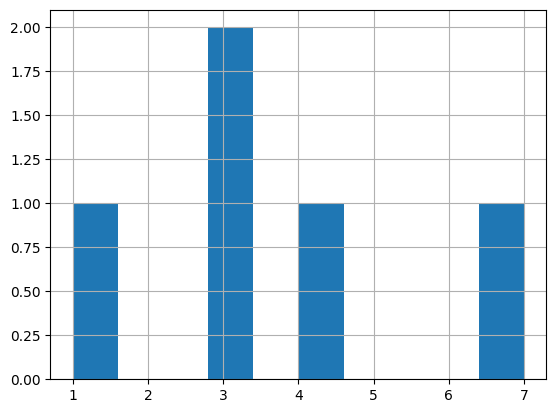

In [ ]:
x.hist()

In [ ]:
# First: 1 + 3 + 3 + 4 + 7 = 10
#
# Second: 18 / 5 = 3.6

# 1, 3, 3  , 4, 7, q50 = 3

#  Salary: 1, 2, 1, 3, 3, 100, avg/mean > 10

# 1, 1, 2 | 3, 3, 100
#  q50 = 2  (<=2),  [1, 1, 2]
# 1, 1 | 2,  3, 3, 100
#  q25 = 1  (<= 1)
# max = q100
# median = q50
x.mean()

3.6

#### Measures of Location

**Min/Max**

Lowest and highest observed values




In [ ]:
# For completeness, min and max
print(x.min())
print(x.max())

1
7


**Median**
Value separating the lower and the upper half of the variable (note that the values have to be sorted in ascendent order)

In [ ]:
x = pd.Series([1, 3, 3, 4, 7, 8, 8, 8, 8])
x.median()
x.mode()

0    8
dtype: int64

In [ ]:
# If we change the order, the median does not change!
pd.Series([3, 7, 1, 4, 3]).median()

3.0

**Median vs. mean**

If we can always take the average, why should we ever use the median?
The median is **robust** against outliers. If you have a very extreme value in you data the mean will be affected very strongly by it. As the median is always the middle value, it is not affected by its extremes

In [ ]:
x = pd.Series([1, 3, 3, 4, 100])

# The mean gets very large!
x.mean()

22.2

In [ ]:
# The median is unchanged
x.median()

3.0

**Quantiles**

Quantiles are related to the median. Remember how the median was the value that split our data in half? In other words 50% of observations are less than the median!

Are we limited to only 50%? No! 25% of all values are below the 25%-quantile. 75% of all values are below the 75%-quantile. This is what the `describe` method is showing to you

In [ ]:
x = pd.Series([1, 3, 3, 5, 6, 9, 10, 15])
# 25%-quantile
x.quantile(0.25)

3.0

In [ ]:
# 75%-quantile
x.quantile(0.75, interpolation='midpoint')

9.5

#### Measures of Dispersion

**Standard deviation (related to mean)**

To get an idea of how much variation we have in our data we can take the difference between our observation and the mean. We are not interested in the direction of the deviation (if our observation is above or below mean). We want to know how large the deviation is for a particular observation. The average over the deviations is our standard deviation

(*Mathematical Note:* This is a simplification of how it is actually [calculated](#https://en.wikipedia.org/wiki/Standard_deviation). Normally you square each deviation to eliminate negative values, then take the average of the squared deviations. This is the variance. At the end you have to take the square root of the variance to get the standard deviation. If you do not understand is, it is ok for now.)





In [ ]:
x = pd.Series([1, 3, 3, 5, 6, 9, 10, 15])
# 25%-quantile
x.mean()

6.5

In [ ]:
x.std()

4.59813626840888

**Interquantile range (related to quantiles)**

Another common way of checking how much variation we have in out data. The calculation is very simple – just take the difference between the 75%-quantile and the 25%-quantile. Since this is not based on the mean, it is more robust

In [ ]:
x = pd.Series([1, 3, 3, 5, 6, 9, 10, 15])
x.quantile(0.75) - x.quantile(0.25)

6.25

Pandas does not have a built-in IQR function. You can calculated it by hand as in the last example or take a look at `describe`, which gives you both the 75%- and the 25%-quantile

In [ ]:
x.describe()

count     8.000000
mean      6.500000
std       4.598136
min       1.000000
25%       3.000000
50%       5.500000
75%       9.250000
max      15.000000
dtype: float64

# Back to the data set
Question : What is the average age for male and female ?

In [ ]:
df[df.Sex == 'male'].Age.mean()

30.72664459161148

In [ ]:
df[df.Sex == 'female'].Age.mean()

27.915708812260537

# Exercises

## Exercise 1
Calculate the following statistics for the Titanic dataset over all passengers, for `Age` and `Fare`:

- Average value
- Median value (or 50th quantile)
- Standard Deviation
- IQR
- Range (max-min)


In [ ]:
df["Age"].mean()

29.69911764705882

In [ ]:
df["Age"].median()

28.0

In [ ]:
df["Age"].std()

14.526497332334042

In [ ]:
df["Age"].quantile(.75) - df["Age"].quantile(.25)

17.875

In [ ]:
df["Age"].max()

80.0

In [ ]:
df["Age"].min()

0.42

In [ ]:
df["Fare"].mean()

32.204207968574636

In [ ]:
df["Fare"].median()

14.4542

In [ ]:
df["Fare"].std()

49.6934285971809

In [ ]:
df["Fare"].quantile(.75) - df["Fare"].quantile(.25)

23.0896

In [ ]:
df["Fare"].max()

512.3292

In [ ]:
df["Fare"].sort_values()

271      0.0000
597      0.0000
302      0.0000
633      0.0000
277      0.0000
         ...   
438    263.0000
341    263.0000
737    512.3292
258    512.3292
679    512.3292
Name: Fare, Length: 891, dtype: float64

What can you conclude about these two metrics? Can you picture their distributions?


In [ ]:
df[['Age', 'Fare']].agg(
 ['min',
  'max',
  'median',
  'std'
 ]
)

,Age,Fare
min,0.420000,0.000000
max,80.000000,512.329200
median,28.000000,14.454200
std,14.526497,49.693429


from matplotlib import pyplot as plt
_df_0['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Fare'].plot(kind='hist', bins=20, title='Fare')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Age', y='Fare', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Fare'].plot(kind='line', figsize=(8, 4), title='Fare')
plt.gca().spines[['top', 'right']].set_visible(False)

## Exercise 2
Use the `plot.hist` method to visualise the distribution of `Age` and `Fare`. Do you think the previously used aggregations gave you a good enough understanding of the distributions?


<Axes: ylabel='Frequency'>

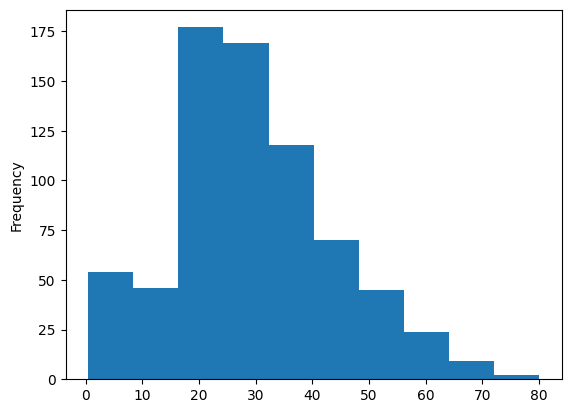

In [ ]:
df.Age.plot.hist()

<Axes: ylabel='Frequency'>

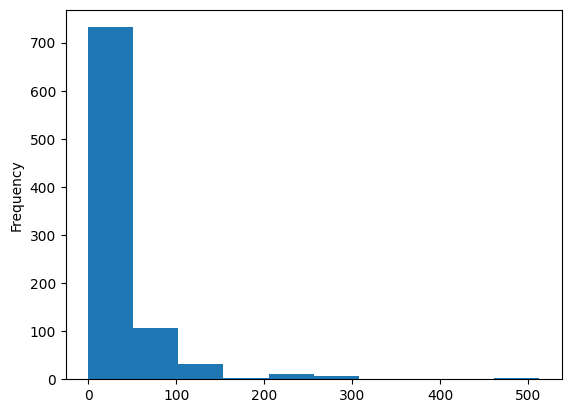

In [ ]:
df.Fare.plot.hist()

# Are 'statistics' the only way we can aggregate data?
Statistics are a good example of aggregation functions, but by far not the only ones!

An aggregation is any function that takes in a set of elements and returns a single element. Some examples of aggregation functions that are pre-implemented by pandas:

- `.mean()`
- `.median()`
- `.sum()` Sum over one entire axis
- `.prod()` Product of all elements over one entire axis
- `.count()` Count all **non null** items along one axis
- `.nunique()` Count unique items along one axis

They all behave very similarly, so we won't explore them too deeply.

## Aggregating a DataFrame

So far we have worked mostly with aggregating functions on a column (i.e. `Series`).

What do you think will happen if you call it on a DataFrame?

Try it out:

In [ ]:
df.sum()

PassengerId                                               460009
Pclass                                                       947
Name           Kelly, Mr. JamesWilkes, Mrs. James (Ellen Need...
Sex            malefemalemalemalefemalemalefemalemalefemalema...
Age                                                      10050.5
SibSp                                                        187
Parch                                                        164
Ticket         3309113632722402763151543101298753833097224873...
Fare                                                     14856.5
Embarked       QSQSSSQSCSSSSSSCQCSCCSSCCSCCSCSSSSCCSSSSCSSSSS...
dtype: object

When working with DataFrames, you will see that most functions expect an input `axis`.

This tells the function along which axis you want to work. For the case of aggregation, along which to run the aggregation.

Try the following:

In [ ]:
# We will create a fake dataframe to make things easier.

fake_data = pd.DataFrame(
    [
     [4,4,4,2,3,2,1,3,2],
     [4,4,4,2,3,2,1,3,2],
     [4,2,4,3,3,1,1,3,2],
     [4,2,4,3,3,1,1,3,2],
    ]
    )

fake_data.head()

,0,1,2,3,4,5,6,7,8
0,4,4,4,2,3,2,1,3,2
1,4,4,4,2,3,2,1,3,2
2,4,2,4,3,3,1,1,3,2
3,4,2,4,3,3,1,1,3,2


In [ ]:
fake_data.sum(axis=0)

0    16
1    12
2    16
3    10
4    12
5     6
6     4
7    12
8     8
dtype: int64

In [ ]:
fake_data.sum(axis=1)

0    25
1    25
2    23
3    23
dtype: int64

In [ ]:
fake_data.sum()

0    16
1    12
2    16
3    10
4    12
5     6
6     4
7    12
8     8
dtype: int64

## What if I need to use an aggregation function that is not defined in Pandas?

You'll find that this is a rare case, but if you need some strange statistic or a function that comes from another library, you have two options:

- Use the numpy or scipy libraries, they have plenty of specific functions
- Use the `agg` method with a self-defined function

### Using numpy functions with Pandas data

In [ ]:
# Numpy is an extremely powerful library for managing datasets in python, and it can easily interoperate with pandas

import numpy as np

np.mean(df.Age.values)

nan

### Using agg

Agg can take any function or list of functions and run it on your series or dataframe.



In [ ]:
df.Age.agg('mean')

29.69911764705882

In [ ]:
df.Age.agg(['mean', 'median'])

mean      29.699118
median    28.000000
Name: Age, dtype: float64

In [ ]:
def my_agg_func(series):
  return series.sum()


df.Age.agg(my_agg_func)

21205.17

In [ ]:
import pandas as pd
import inspect

In [ ]:
# function help hit 'TAB' or 'ctrl-space' after a '.'
# but first import the library for which documentation is requested
# also check 'Tools - kexboard shortcuts'
df = pd.read_csv(
  filepath_or_buffer='https://raw.githubusercontent.com/aaronmcdaid/P2---Data-Analytics-With-Python/master/Berlin/WS%202019/5.%20Datasets/titanic_dataset/train.csv',
)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


🔍 A statistical hypothesis is an assumption about the distribution of a variable that may or may not be true.

Now it will be a little confusing: a statistical hypothesis consists of two hypotheses - the null and the alternative.

     The null hypothesis indicates that there are no differences in the compared groups.
     The alternative hypothesis, on the contrary, states that there are differences.

Let's say we want to test whether there is a relationship between the number of Titanic's passengers and passengers gender. In this study, our statistical hypothesis would look like this:

     Null hypothesis: There is no significant difference in amount of male and women Titanic passengers.
     An alternative hypothesis is that there is such a difference.

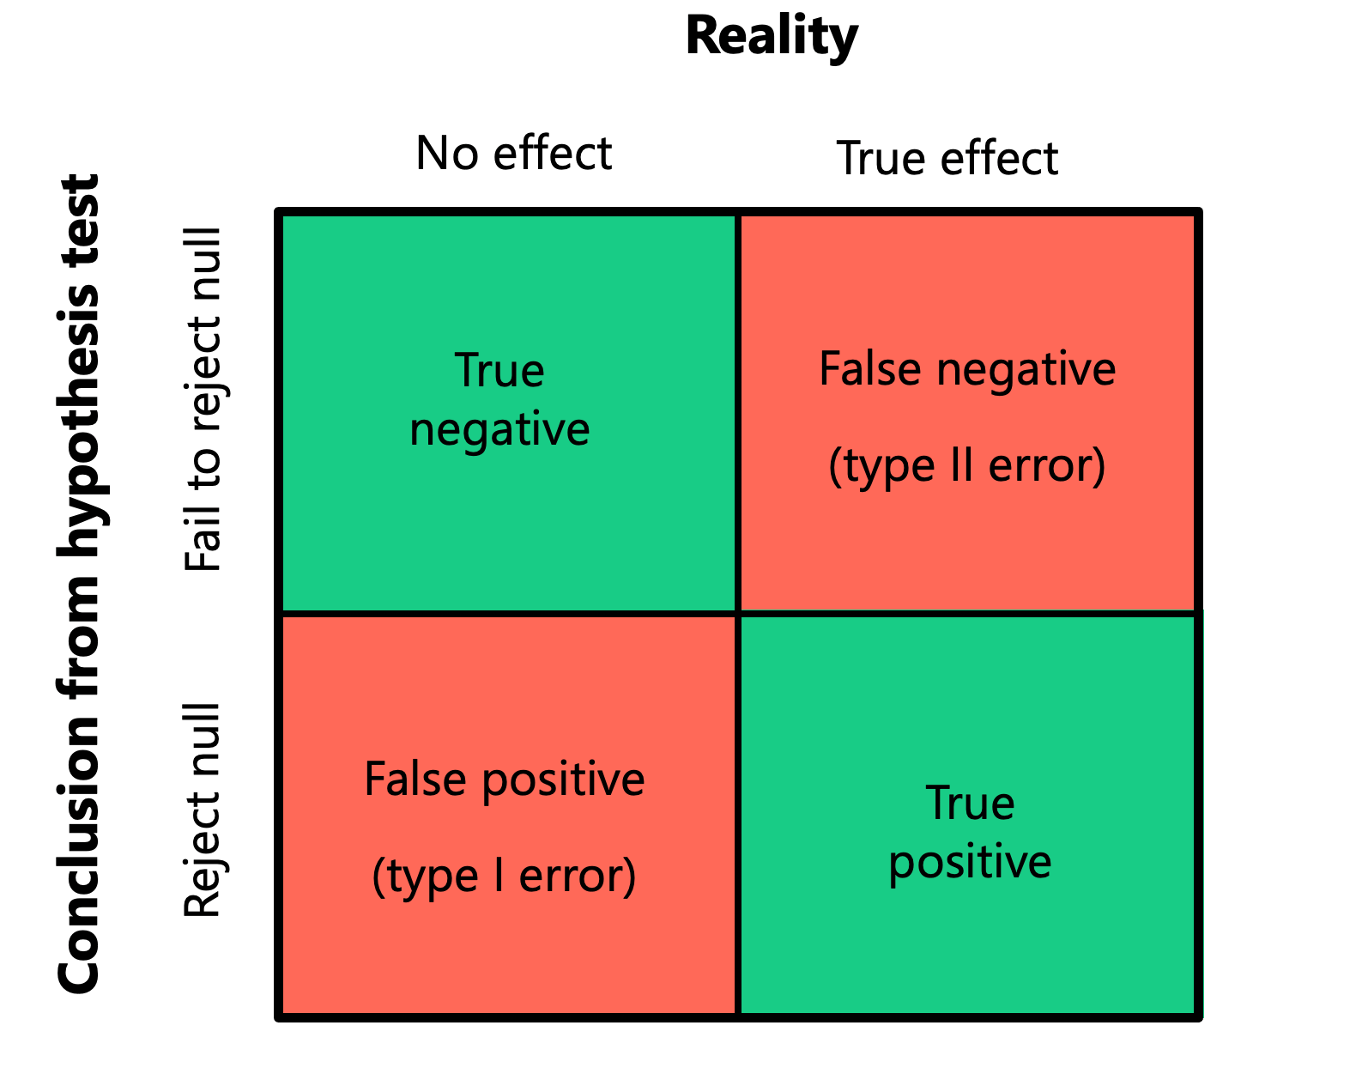

Statistical tests

This is a strict mathematical rule by which a statistical hypothesis is accepted or rejected.

Conducting a statistical test consists of the following steps:

     preparing data tables;
     checking the normality of distribution;
     formulating hypotheses;
     calculations.

Tests can be parametric or non-parametric. If we are sure that the data is normally distributed, we can conduct parametric tests. If not, then nonparametric.

For example, we want to compare the average ratings of two book series. One has published ten books, the other four. We do not know whether the data is normally distributed, since our sample is less than 30 observations. Therefore, we choose a nonparametric test.

Binomial test

    Type: non-parametric.
    Used: When we have some guess about how often an event should happen and we want to test it.
    Data: a variable that takes two values.
    Null hypothesis: There is no difference between the actual and expected distribution.

In [ ]:
from scipy.stats import binomtest
#binomtest
num_of_people_per_sex = df['Sex'].value_counts().sort_values().tolist()

binomtest(num_of_people_per_sex[0], num_of_people_per_sex[1] + num_of_people_per_sex[0])


BinomTestResult(k=314, n=891, alternative='two-sided', statistic=0.35241301907968575, pvalue=9.419916252965797e-19)

p-value is the probability of obtaining our data in reality where the null hypothesis is true.

T-test

  Type: parametric.

  Use: When there is a need to understand whether there are differences in the mean value of a variable between two groups of observations.

  Data: must consist of two variables - according to one variable they are divided into two groups, according to the other they are compared with each other.

  Null hypothesis: the mean values of the variable in the two groups do not differ significantly.

  



---



---



  What else can be checked with a T-test:

   whether average ratings for fiction books in English differ from ratings for fiction books in general;

   On average, how much better did patients who had laser eye surgery see compared to those who did not have surgery?

   Does the average taxi travel distance differ between passengers with and without children?

  Fun fact: The T-test is the basis for a/b testing in marketing and product management.

Before performing a T-test, it should be checked that the variable to be estimated is:

     continuous (for example, age);
     distributed close to normal;
     has minor differences in variance between the two groups of observations.

In [ ]:
#T test
from scipy.stats import shapiro

mean_male_age = []
n = 1

while n < 1000:
  n += 1
  sample = df[(df["Sex"] == "male") & (df["Age"] >= 18)].sample(100)["Age"].mean()
  mean_male_age.append(sample)

shapiro(mean_male_age)


ShapiroResult(statistic=0.9976567625999451, pvalue=0.16727431118488312)

In [ ]:

mean_female_age = []
n = 1

while n < 1000:
  n += 1
  sample = df[(df["Sex"] == "female") & (df["Age"] >= 18)].sample(100)["Fare"].mean()
  mean_female_age.append(sample)

shapiro(mean_female_age)

ShapiroResult(statistic=0.9973649978637695, pvalue=0.10463817417621613)

In [ ]:
from scipy.stats import levene

male_age = df[(df['Sex'] == "male") & (df["Age"] >= 18)].sample(100)['Fare']
female_age = df[(df["Sex"] == "female") & (df["Age"] >= 18)].sample(100)['Fare']
levene(male_age, female_age)

LeveneResult(statistic=5.30408997543476, pvalue=0.022314202430942908)

In [ ]:
from scipy.stats import ttest_ind

ttest_ind(male_age, female_age, equal_var=False)
print(male_age.mean(), female_age.mean())

29.968915000000006 49.10070999999999


In [ ]:
from math import comb

comb(6, 4)

15

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def run_binom(trials, n, p):
    heads = []
    for i in range(trials):
        tosses = [np.random.random() for i in range(n)]
        heads.append(len([i for i in tosses if i >= 0.5]))
    return heads


# Amount of iterations
trials = 5000
# Amount of tosses per iteration
n = 100
# Probability of success (heads are considered as success)
p = 0.5

heads = run_binom(trials, n, p)# Plot the results as a histogram fig,
ax = plt.subplots(figsize=(14,7))
ax = sns.distplot(heads, bins=11, label='simulation results')
ax.set_xlabel("Number of Heads",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)

## How does one display specific statistical datatypes?
- example discrete vs discrete => contingency tables
- taken from https://www.kaggle.com/code/hamelg/python-for-data-25-chi-squared-tests/notebook